In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

DATA COLLECTION AND PROCESSING

In [49]:
#loading the data from csv file to pandas 
car_dataset = pd.read_csv('car data.csv')

In [50]:
# inspecting the 5 rows of the dataFrame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Manual,1
1,sx4,2013,4.75,9.54,43000,Diesel,Manual,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Manual,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Manual,1
4,swift,2014,4.60,6.87,42450,Diesel,Manual,1


In [51]:
#checking the number of rows
car_dataset.shape


(301, 8)

In [52]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [53]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Transmission     0
Owner            0
dtype: int64

In [54]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


ENCODING THE CATEGORICAL DATA

In [55]:
#encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)

#encoding "Transmission" Column
car_dataset.replace({'Transmission': {'Manual':0,'Automatic':1}}, inplace=True)

/var/folders/cl/4dd7vl6j6k90w1k1mxbyj1sr0000gp/T/ipykernel_13241/3110729493.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol':0,'Diesel':1,'CNG':2}}, inplace=True)
/var/folders/cl/4dd7vl6j6k90w1k1mxbyj1sr0000gp/T/ipykernel_13241/3110729493.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission': {'Manual':0,'Automatic':1}}, inplace=True)


In [56]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,1


SPLITTING THE DATA INTO target

In [57]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [58]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Transmission  Owner
0    2014           5.59       27000          0             0      1
1    2013           9.54       43000          1             0      1
2    2017           9.85        6900          0             0      1
3    2011           4.15        5200          0             0      1
4    2014           6.87       42450          1             0      1
..    ...            ...         ...        ...           ...    ...
296  2016          11.60       33988          1             0      1
297  2015           5.90       60000          0             0      1
298  2009          11.00       87934          0             0      1
299  2017          12.50        9000          1             0      1
300  2016           5.90        5464          0             0      1

[301 rows x 6 columns]


In [59]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


SPLITTING THE DATA INTO TRAINING AND TEST DATA

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.1, random_state=2)

MODEL TRAINING

1. LINEAR REGRESSION

In [61]:
#loading the linear regression model
lin_reg_model = LinearRegression()

TRAINING A MODEL

In [62]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

MODEL EVALUATION

In [63]:
#predicting on the model data
training_data_prediction = lin_reg_model.predict(X_train)

EXPLANATION BY ME

In [64]:
training_data_predictions=pd.DataFrame(training_data_prediction)
actual_data=pd.DataFrame(Y_test)


In [65]:
training_data_predictions.head()


,0
0,3.270225
1,5.252384
2,8.329285
3,-1.620370
4,6.525633


In [66]:
actual_data.head()

,Selling_Price
99,9.65
161,0.45
89,4.75
30,3.10
232,11.45


THE ABOVE SHOWS THE PREDICTIONS

In [67]:
from sklearn import metrics

# R squared score
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R squared Score: ', error_score)

R squared Score:  0.8716940870932399


VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES

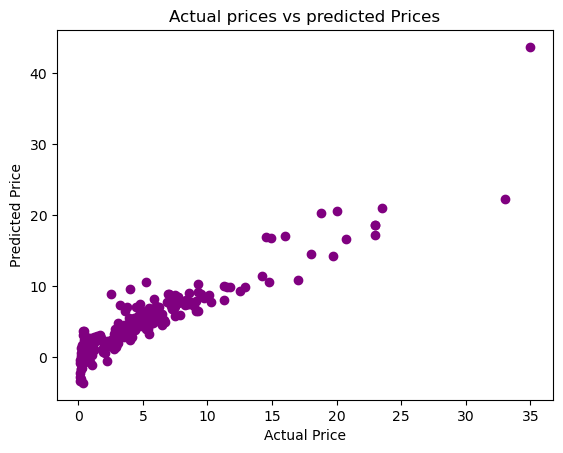

In [73]:
plt.scatter(Y_train, training_data_predictions, c='purple')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs predicted Prices')
plt.show()

In [69]:
#predicting on the model data
test_data_prediction = lin_reg_model.predict(X_test)

In [70]:

# R squared score
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared Score: ', error_score)

R squared Score:  0.81191654715072


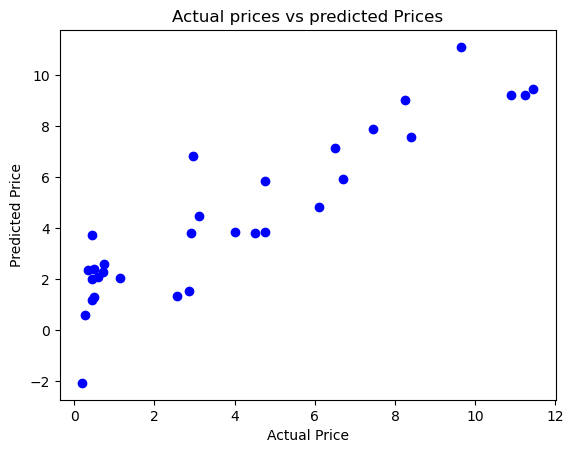

In [72]:
plt.scatter(Y_test, test_data_prediction, c='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices vs predicted Prices')
plt.show()

LASSO REGRESSION